# SF Building Permit Project

### A. Introduction
#### Preliminary data (from Daisy)
From 2013 to 2017, a total of 196,888 permits were submitted in SF. Over 89% of the permits were over the counter alterations permits. The number of permits filed varied over any given time period and location.

#### Significance
By understanding when permits are filed, City of SF can optimize human resources allocation.

#### Question
Which factors are related to variability in number of permits filed?

#### Hypothesis
There are three primary drivers--geography, seasonality, and economics.
<br>My contribution is to examine seasonality and economics (stock indices; Rick did GDP).

#### Data source
Kaggle; SF Building Permits; 7/11/18 accessed; https://www.kaggle.com/aparnashastry/building-permit-applications-data

### B. Examine data
Jason already examined the data, but he did geographical analysis, and I need to re-examine for my trend analysis.

In [1]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('Building_Permits.csv')
df.head()

/Users/rosaria/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

#### B.1. Convert data types
-  Permit Number (str) => use as ID
-  Permit Type (int) => useful later?
-  Current Status (str: need to see available values) => later?
-  Filed Date (datetime)
-  Issued Date (datetime): 14940 NA
-  Completed Date (datetime) => later?: 101709 NA


In [3]:
# make a new df containing the needed columns
# keep permit type, current status, issued & completed date in case I want to use it for a later analysis
newdf = df[['Permit Number', 'Permit Type', 'Current Status', 'Filed Date', 'Issued Date', 'Completed Date']].copy()
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
Permit Number     198900 non-null object
Permit Type       198900 non-null int64
Current Status    198900 non-null object
Filed Date        198900 non-null object
Issued Date       183960 non-null object
Completed Date    97191 non-null object
dtypes: int64(1), object(5)
memory usage: 9.1+ MB


In [4]:
# convert data types
import datetime as dt

def convert_to_dt(x):
    '''
    change string to datetime format
    if not possible, return as is
    '''
    try:
        return dt.datetime.strptime(x, '%m/%d/%Y').date()
    except:
        return x

newdf[['Filed Date', 'Issued Date', 'Completed Date']] = newdf[['Filed Date', 'Issued Date', 'Completed Date']].applymap(convert_to_dt)
newdf.info()
newdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
Permit Number     198900 non-null object
Permit Type       198900 non-null int64
Current Status    198900 non-null object
Filed Date        198900 non-null object
Issued Date       183960 non-null object
Completed Date    97191 non-null object
dtypes: int64(1), object(5)
memory usage: 9.1+ MB


,Permit Number,Permit Type,Current Status,Filed Date,Issued Date,Completed Date
0,201505065519,4,expired,2015-05-06,2015-11-09,NaN
1,201604195146,4,issued,2016-04-19,2017-08-03,NaN
2,201605278609,3,withdrawn,2016-05-27,NaN,NaN
3,201611072166,8,complete,2016-11-07,2017-07-18,2017-07-24
4,201611283529,6,issued,2016-11-28,2017-12-01,NaN


#### B.2. Examine data range & values

In [5]:
# see the date range, available values for permit type, current status
newdf.max()

Permit Number        M893447
Permit Type                8
Current Status     withdrawn
Filed Date        2018-02-23
dtype: object

In [6]:
newdf.min()

Permit Number     201301027037
Permit Type                  1
Current Status          appeal
Filed Date          2013-01-02
dtype: object

In [7]:
sorted(newdf['Permit Type'].unique())

[1, 2, 3, 4, 5, 6, 7, 8]

In [8]:
sorted(newdf['Current Status'].unique())

['appeal',
 'approved',
 'cancelled',
 'complete',
 'disapproved',
 'expired',
 'filed',
 'incomplete',
 'issued',
 'plancheck',
 'reinstated',
 'revoked',
 'suspend',
 'withdrawn']

#### B.3. Add columns: year, month, day, weekday
so that I can use pandas groupby function more easily

In [9]:
year = newdf['Filed Date'].apply(lambda x: x.year)
month = newdf['Filed Date'].apply(lambda x: x.month)
# Monday is 0
weekday = newdf['Filed Date'].apply(lambda x: x.weekday())

newdf = newdf.assign(Year = year, Month = month, Weekday = weekday)

newdf.info()
newdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 9 columns):
Permit Number     198900 non-null object
Permit Type       198900 non-null int64
Current Status    198900 non-null object
Filed Date        198900 non-null object
Issued Date       183960 non-null object
Completed Date    97191 non-null object
Year              198900 non-null int64
Month             198900 non-null int64
Weekday           198900 non-null int64
dtypes: int64(4), object(5)
memory usage: 13.7+ MB


,Permit Number,Permit Type,Current Status,Filed Date,Issued Date,Completed Date,Year,Month,Weekday
0,201505065519,4,expired,2015-05-06,2015-11-09,NaN,2015,5,2
1,201604195146,4,issued,2016-04-19,2017-08-03,NaN,2016,4,1
2,201605278609,3,withdrawn,2016-05-27,NaN,NaN,2016,5,4
3,201611072166,8,complete,2016-11-07,2017-07-18,2017-07-24,2016,11,0
4,201611283529,6,issued,2016-11-28,2017-12-01,NaN,2016,11,0


#### B.4. Filter date range
The date filed ranges from 2013-01-02 to 2018-02-23, so we decided to use data from 2013-2017.

In [10]:
dtdf = newdf[newdf['Filed Date'].map(lambda x: x < dt.date(2018, 1, 1))]
dtdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192947 entries, 0 to 198899
Data columns (total 9 columns):
Permit Number     192947 non-null object
Permit Type       192947 non-null int64
Current Status    192947 non-null object
Filed Date        192947 non-null object
Issued Date       179445 non-null object
Completed Date    96767 non-null object
Year              192947 non-null int64
Month             192947 non-null int64
Weekday           192947 non-null int64
dtypes: int64(4), object(5)
memory usage: 14.7+ MB


### C. Examine number of permits filed by year, month, weekday

#### C. 1. Calculate number of workdays to normalize number of permits filed
There are different number of workdays (M-F that do not fall on holidays) in different time periods, so normalize permits filed by workday. 

In [11]:
from pandas.tseries import holiday
import calendar 

cal = holiday.USFederalHolidayCalendar()
holidays = cal.holidays(start='2013-01-01', end='2018-01-01').to_pydatetime()

def is_workday(year, month, day):
    ''' returns True if workday (not federal holiday or a weekend)'''
    if dt.datetime(year, month, day) not in holidays and dt.date(year, month, day).weekday() < 5:
        return True

def find_maxDay(year, month):
    ''' 
    returns number of days in the year & month
    force year & month to be int (odd error)
    '''
    year = int(year)
    month = int(month)
    return calendar.monthrange(year, month)[1]
    
def find_work_days(year, month, maxDay):
    ''' 
    calculates number of work days from in a given year & month up to maxDay
    force year & month to be int if not already (odd error)
    '''
    year = int(year)
    month = int(month)
    days = 0
    for day in range(1, maxDay+1):
        if is_workday(year, month, day):
            days += 1
    return days

One hypothesis is that there is a seasonal component to the trend, which can be captured by weather data. Weather data from: National Weather Service Forecast Office, San Francisco Bay Area/Monterey; 7/17/18 accessed; https://w2.weather.gov/climate/xmacis.php?wfo=mtr
<br><br>
Import weather data, and add number of workdays in a given month.

In [12]:
weather = pd.read_csv('sf_weather.csv')
# for some reason, year & month are coming out to be floats even through it's claimed to be int
# & cannot seem to force int type using astype or applymap(int)
workday = weather.apply(lambda x: find_work_days(x.Year, x.Month, find_maxDay(x.Year, x.Month)), axis = 1)
weather = weather.assign(Workday = workday)
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
Year             60 non-null int64
Month            60 non-null int64
Precipitation    60 non-null float64
Max_temp         60 non-null int64
Avg_temp         60 non-null float64
Workday          60 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.9 KB


,Year,Month,Precipitation,Max_temp,Avg_temp,Workday
0,2013,1,0.49,64,50.8,21
1,2013,2,0.85,71,52.4,19
2,2013,3,0.97,73,55.2,21
3,2013,4,1.01,82,57.6,22
4,2013,5,0.04,88,58.7,22


#### C.2. Yearly analysis

In [13]:
def count_permit(x):
    '''counts number of permits filed'''
    return x['Permit Number'].count()

def make_aggregate(df, group):
    '''
    returns df combining number of permits filed in a group and workdays
    '''
    return pd.merge(count_permit(df.groupby(group)).reset_index(), weather.groupby(group)['Workday'].sum().reset_index(), on=[group])

# calculate number of permits filed each year & add a column for number of workdays each year
df_yearly = make_aggregate(dtdf, 'Year')
df_yearly = df_yearly.assign(Permit_per_day = df_yearly['Permit Number'] / df_yearly['Workday'])
df_yearly.info()
df_yearly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
Year              5 non-null int64
Permit Number     5 non-null int64
Workday           5 non-null int64
Permit_per_day    5 non-null float64
dtypes: float64(1), int64(3)
memory usage: 200.0 bytes


,Year,Permit Number,Workday,Permit_per_day
0,2013,35227,251,140.346614
1,2014,36691,251,146.179283
2,2015,40138,251,159.912351
3,2016,39740,251,158.326693
4,2017,41151,250,164.604000


Text(0,0.5,'# Permits filed / day')

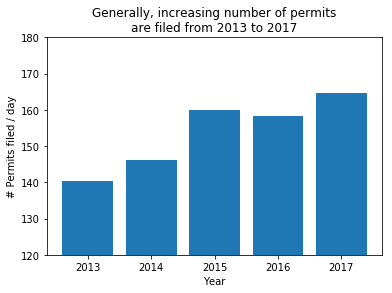

In [14]:
# plot to see trend
names = df_yearly['Year']
ticks = range(0, len(names))
plt.bar(ticks, df_yearly['Permit_per_day'])
plt.title('Generally, increasing number of permits\nare filed from 2013 to 2017')
plt.xticks(ticks, names)
plt.xlabel('Year')
plt.ylim(120,180)
plt.ylabel('# Permits filed / day')

#### C.3. Monthly analysis (by month)

In [15]:
df_monthly = make_aggregate(dtdf, 'Month')
df_monthly = df_monthly.assign(Permit_per_day = df_monthly['Permit Number'] / df_monthly['Workday'])
df_monthly

,Month,Permit Number,Workday,Permit_per_day
0,1,13601,101,134.663366
1,2,14120,96,147.083333
2,3,16392,110,149.018182
3,4,15824,107,147.887850
4,5,16560,106,156.226415
5,6,17249,107,161.205607
6,7,16454,106,155.226415
7,8,17582,110,159.836364
8,9,17808,103,172.893204
9,10,17360,106,163.773585


In [16]:
df_monthly.mean()

Month                 6.500000
Permit Number     16078.916667
Workday             104.500000
Permit_per_day      153.796028
dtype: float64

In [17]:
df_monthly.std(ddof=0)

Month                3.452053
Permit Number     1326.227762
Workday              4.481443
Permit_per_day       9.967113
dtype: float64

[Text(0,0.5,'# Permit filed / day'),
 Text(0.5,1,'Less permits are filed from Nov-Apr')]

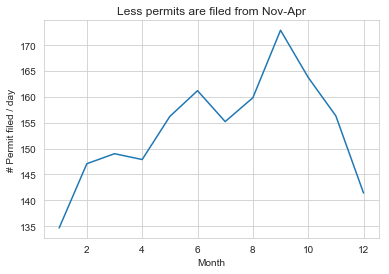

In [18]:
import seaborn as sns

sns.set_style('whitegrid')
fig = sns.lineplot(x='Month', y='Permit_per_day', data=df_monthly)
fig.set(title = 'Less permits are filed from Nov-Apr', ylabel='# Permit filed / day')


#### C.4. Year-monthly analysis

In [19]:
year_monthly = dtdf.groupby(['Year', 'Month'])
df_year_monthly = pd.merge(count_permit(year_monthly).reset_index(), weather[['Year', 'Month', 'Workday']], on=['Year', 'Month'])
df_year_monthly = df_year_monthly.assign(Permit_per_day = df_year_monthly['Permit Number'] / df_year_monthly['Workday'])
df_year_monthly

,Year,Month,Permit Number,Workday,Permit_per_day
0,2013,1,2723,21,129.666667
1,2013,2,2484,19,130.736842
2,2013,3,2731,21,130.047619
3,2013,4,2904,22,132.000000
4,2013,5,3157,22,143.500000
5,2013,6,2962,20,148.100000
6,2013,7,3064,22,139.272727
7,2013,8,3162,22,143.727273
8,2013,9,3037,20,151.850000
9,2013,10,3371,22,153.227273


Now see if there is a seasonal correlation between number of permits filed & weather

In [20]:
df_monthly_weather = pd.merge(df_year_monthly, weather[['Year', 'Month', 'Precipitation', 'Max_temp', 'Avg_temp']], on=['Year', 'Month'])
df_monthly_weather

,Year,Month,Permit Number,Workday,Permit_per_day,Precipitation,Max_temp,Avg_temp
0,2013,1,2723,21,129.666667,0.49,64,50.8
1,2013,2,2484,19,130.736842,0.85,71,52.4
2,2013,3,2731,21,130.047619,0.97,73,55.2
3,2013,4,2904,22,132.000000,1.01,82,57.6
4,2013,5,3157,22,143.500000,0.04,88,58.7
5,2013,6,2962,20,148.100000,0.15,77,60.4
6,2013,7,3064,22,139.272727,0.00,79,59.7
7,2013,8,3162,22,143.727273,0.04,77,61.3
8,2013,9,3037,20,151.850000,0.39,83,63.5
9,2013,10,3371,22,153.227273,0.00,83,59.8


In [21]:
# export data
df_monthly_weather.to_csv('monthly_weather.csv')

Data was exported and analyzed in Excel for convenience due to impending deadline (see monthly_weather.xlsx for analysis).

Further analysis on 'seasonality_economics_rosaria.xlsx'.